In [1]:
import logging
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.ops import cascaded_union
import fiona.crs
from geovoronoi.plotting import subplot_for_map, plot_voronoi_polys_with_points_in_area
from geovoronoi import voronoi_regions_from_coords, points_to_coords

In [2]:
logging.basicConfig(level=logging.INFO)
geovoronoi_log = logging.getLogger('geovoronoi')
geovoronoi_log.setLevel(logging.INFO)
geovoronoi_log.propagate = True

In [3]:
census = gpd.read_file('/Users/jiangna/Desktop/DTRA_O_shp/censusclip1.shp').set_index('GEOID10')

In [4]:
school = gpd.read_file('/Users/jiangna/Desktop/DTRA_R_shp/school_w_ID.shp')

In [5]:
school = school.drop('geometry',axis =1 ).copy()

In [6]:
from shapely.geometry import Point
# combine lat and lon column to a shapely Point() object
school['geometry'] = school.apply(lambda x: Point((float(x.LONGITUDE), float(x.LATITUDE))), axis=1)

In [7]:
school = gpd.GeoDataFrame(school, geometry='geometry')

In [8]:
ndp = census[census.index.str.startswith('09')].copy()

In [9]:
sct = school[school.scolID.str.startswith('09')].copy()

In [10]:
sct.shape

(1489, 10)

In [11]:
coord = points_to_coords(sct.geometry)

In [12]:
census = cascaded_union(ndp.geometry)

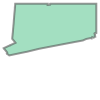

In [13]:
census

In [77]:
sch_in = sct[sct.geometry.within(census)]

In [78]:
sch_in.shape

(1489, 10)

In [ ]:
poly_shapes, pts, poly_to_pt_assignments = voronoi_regions_from_coords(coord, census)

In [146]:
#list to dataframe
import pandas as pd
df = pd.DataFrame({'geometry':vpolygon})

In [148]:
#dataframe to geodataframe
from shapely.geometry import Polygon
df = gpd.GeoDataFrame(df, geometry='geometry')

In [150]:
df.to_file('/Users/jiangna/Desktop/DTRA_R_shp/VD_CT.shp')

In [149]:
type(df)

geopandas.geodataframe.GeoDataFrame

In [138]:
gs.crs = {'init': 'epsg:4326'}

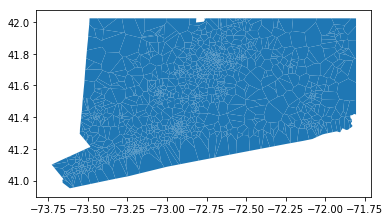

In [140]:
gs.plot()

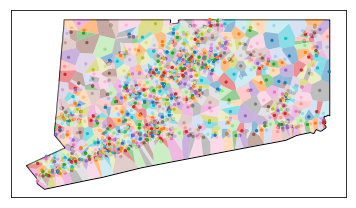

In [120]:
#plotting
fig, ax = subplot_for_map()
plot_voronoi_polys_with_points_in_area(ax, census, poly_shapes, coord, poly_to_pt_assignments)
plt.show()